# MSDS 400 Relative and Absolute Extrema

In [1]:
import numpy as np
import matplotlib.pyplot as plt

`extrema()` is a classification function used to evaluate a trio of points. The function will evaluate the middle point of trio to determine if it represents a relative maxima or minima for the trio. The result will be a boolean value True or False which will be used later. Note that if the middle point is not an extrema, the value False will be returned.

In [2]:
def extrema(a, b, c):
    x = max(a, b, c)
    z = min(a, b, c)
    epsilon = 0.0000001  # This is a safeguard against minor differences.
    result = False
    if abs(b - x) < epsilon:
        result = True
    if abs(b - z) < epsilon:
        result = True
    return result

This is a user supplied function, f(x) = (x - 1)<sup>2/3</sup>

In [3]:
def f(x):
    y = (x ** 8) ** .333 - 16.0 * (x ** 2) ** .33
    return y

The following extrema evaluation will be over a defined interval. Grid points
will be defined and the function extreme() will compare trios of values.

Define interval endpoints for a closed interval [xa,xb].

In [4]:
xa = -1.0
xb = +9.0

n = number of grid points.  The interval [xa,xb] will be subdivided.
Adding delta to xb insures xb is included in the array generated.  For this
purpose, np.arange() will be used to create a numpy array of floating point
values to be used in subsequent calculations.

In [5]:
n = 1000
delta = (xb - xa) / n
x = np.arange(xa, xb + delta, delta)
y = f(x)

value = [False]  # This defines the list value which will contain Boolean values.
value = value * len(x)  # This expands the list to the length of x.

We are going to check each trio of points during the grid search.
If a local extrema is found, the boolean value will be set to True.
Otherwise it will remain False. The interval endpoints are always local
extrema so we define their boolean values first.

In [7]:
L = len(x)
value[0] = True  # This will correspond to one endpoint.
value[L - 1] = True  # This corresponds to the other.

The for loop will check each consecutive trios of f values with the function
extrema() to identify local extrema.  Only when an extrema is found will the
boolean value in the list value be changed to True.

In [8]:
for x_index in range(L - 2):
    first_x = x[x_index]
    second_x = x[x_index + 1]
    third_x = x[x_index + 2]
    a = f(first_x)
    b = f(second_x)
    c = f(third_x)
    is_second_x_extrema = extrema(a, b, c)
    value[x_index + 1] = is_second_x_extrema

for k in range(L - 2):
    value[k + 1] = extrema(f(x[k]), f(x[k + 1]), f(x[k + 2]))

max_value = max(y)  # We check the list to find the global maxima.
min_value = min(y)  # We check the list to find the global minima.

The following for loop checks the boolean value for each point. If the value
is True, that point will be plotted yellow.  The global maximum is plotted as
red and the minimum is plotted as green. We follow this up by plotting the
values of x and y.

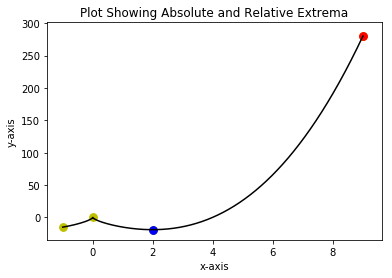

In [9]:
error = 0.0000001  # The error parameter guards against roundoff error.
# The code which follows assigns colors to maxima and minima and plots them.

plt.figure()
for k in range(L):
    if value[k] is True:
        plt.scatter(x[k], y[k], s=60, c='y')
        if abs(max_value - y[k]) < error:
            plt.scatter(x[k], y[k], s=60, c='r')
        if abs(min_value - y[k]) < error:
            plt.scatter(x[k], y[k], s=60, c='b')

plt.plot(x, y, c='k')  # This plots the line on the chart.
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot Showing Absolute and Relative Extrema')
plt.show()